In [4]:
from pathlib import Path, PureWindowsPath
sys.path.append(PureWindowsPath(r"C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo\sources").as_posix())
import sys
import os
from lib_general import *

set_current_directory_to_root(root = "classification_texte_bapteme_philo")
print("os.getcwd() at root =", os.getcwd()) 

os.getcwd() at root = C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [5]:
add_paths(paths = ["/sources/classification/"])

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from pathlib import Path, PureWindowsPath
from lib_classification import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [19]:
filename = "data_middle_age_epistemology.parquet"
input_or_output = "input"
class_col_name = "category"
id_col_name = "id"
features_col_names = "message_preprocessed" 
# class_col_name = "category"
class_col_name = "category_bin"

# # filename = "data_philosophy_baptism.parquet"
# # filename = "data_history_baptism.parquet"
# corpus = get_dataset(filename)

corpus = pd.read_parquet(r"C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo\data\input\merged_corpus\corpus_alexanderpruss_exapologist.parquet")
corpus = get_balanced_binary_dataset(corpus, class_col_name)
corpus

,id,message,message_preprocessed,category,length,category_bin
0,0,"6\. Jesus was executed on the charge of political sedition, due to his claim that he was the King of the Jews. His execution was therefore directly related to his apocalyptic message of the imminent coming of the kingdom of God.",jesus executed charge political sedition due claim king jew execution therefore directly related apocalyptic message imminent coming kingdom god,exapologist,228,0
1,1,"Lydia, That there are evils that have F is quite unsurprising on theism if it's part of the background that there are lots of evils. If there are lots of evils, even if none are gratuitous, it's unsurprising that some look gratuitous. Just as, if there are lots of cats, it's unsurprising that some look like dogs. So the evidence I am interested in is that a particular token evil E has or lacks F.",lydia evil f quite unsurprising theism part background lot evil lot evil even none gratuitous unsurprising look gratuitous lot cat unsurprising look like dog evidence interested particular token evil e lack f,alexanderpruss,403,1
...,...,...,...,...,...,...
1958,1958,### New Critique of Brower's Truthmaker Analysis of Divine Simplicity,new critique truthmaker analysis divine simplicity,exapologist,70,0
1959,1959,"The answer depends on whether we include among the compatibilist conditions on freedom the condition that the agent’s actions are not intentionally determined by another agent. If we include that condition, then Alice is not free. But it is my impression that defenders of compatibilism these days (e.g., Mele) have been inclining towards not requiring such a non- determination-by-another-agent condition. So I will take it that there is no such condition, and Alice is free.",answer depends whether include among compatibilist condition freedom condition action intentionally determined another agent include condition alice free impression defender compatibilism day eg mele inclining towards requiring non- determination-by-another-agent condition take condition alice free,alexanderpruss,476,1


In [15]:
corpus.value_counts("category")

category
alexanderpruss    980
edwardfeser       980
dtype: int64

In [16]:
check_duplicates(corpus, id_col_name)

presence de doublons ?
False
False


In [20]:
X_train, X_test, y_train, y_test, indices_train, indices_test = get_train_and_test(corpus, features_col_names, class_col_name, id_col_name)
X_train_tfidf, X_test_tfidf = apply_tfidf_to_train_and_test(X_train, X_test)

In [25]:
scorings = ['accuracy', 'f1_macro']
num_iter = 5 #nombre de repetitions de la k-fold cross validation entiere
k = 10 #k de la k-fold cross validation
do_cross_validation(X_train_tfidf, y_train, scorings, num_iter, k)

models = [('LR', LogisticRegression(multi_class='ovr', solver='liblinear')), ('AdaBoostClassifier', AdaBoostClassifier()), ('KNN', KNeighborsClassifier()), ('RandomForest', RandomForestClassifier()), ('SGDClassifier', SGDClassifier()), ('SVM', SVC()), ('DecisionTreeClassifier', DecisionTreeClassifier())]
[('test_accuracy', 0.9072), ('test_f1_macro', 0.907)] (LR)
[('test_accuracy', 0.7994), ('test_f1_macro', 0.799)] (AdaBoostClassifier)
[('test_accuracy', 0.9049), ('test_f1_macro', 0.9046)] (KNN)
[('test_accuracy', 0.8384), ('test_f1_macro', 0.8382)] (RandomForest)
[('test_accuracy', 0.9088), ('test_f1_macro', 0.9087)] (SGDClassifier)
[('test_accuracy', 0.913), ('test_f1_macro', 0.9128)] (SVM)
[('test_accuracy', 0.772), ('test_f1_macro', 0.7717)] (DecisionTreeClassifier)


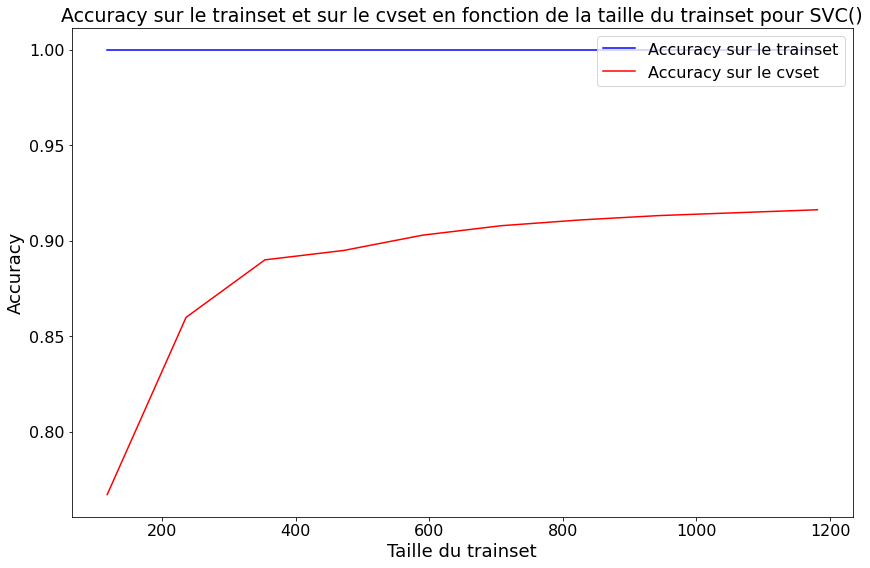

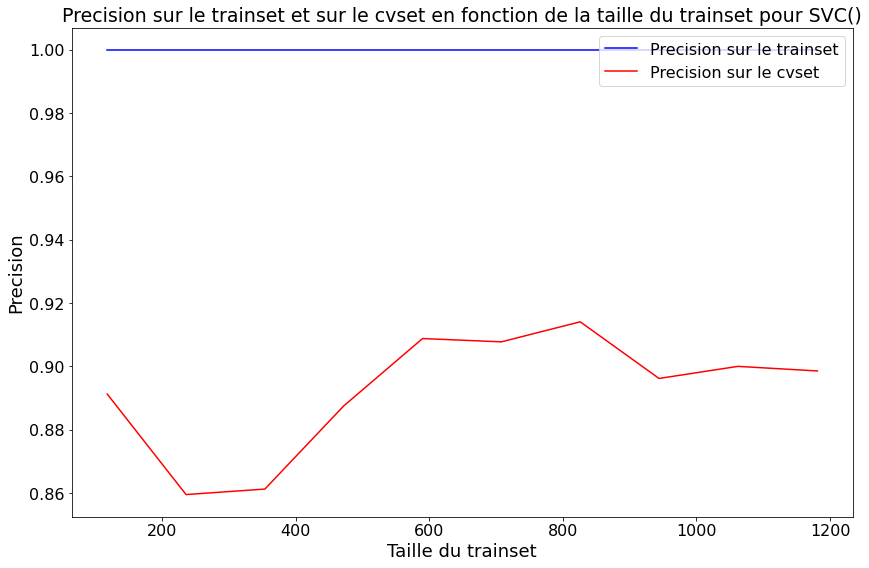

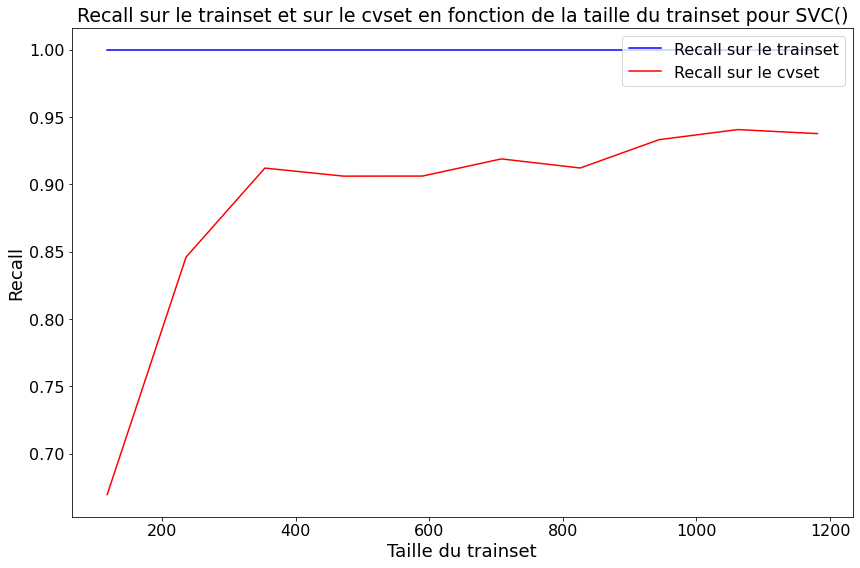

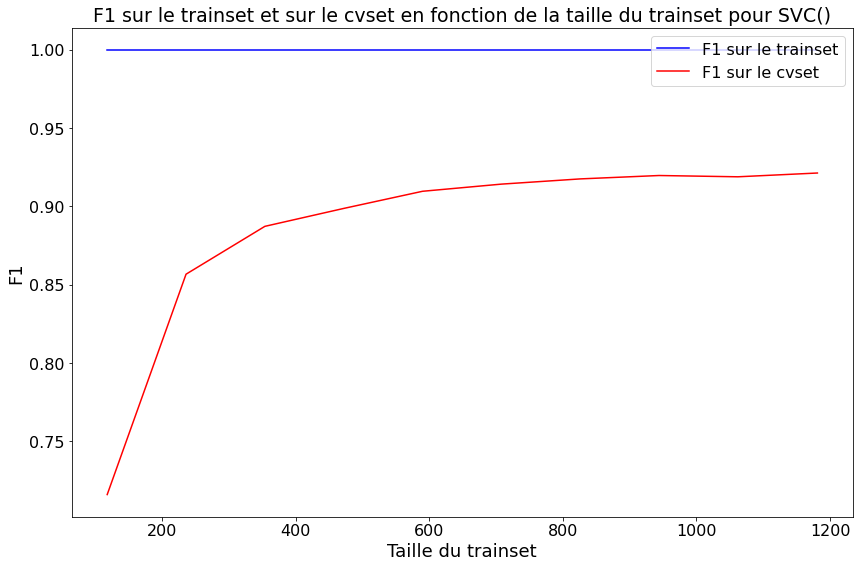

In [26]:
k = 10
# kfold = StratifiedKFold(n_splits=k, random_state=None, shuffle=True) #n_splits = k de la k-fold cv, le nombre de fold
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=2, random_state=None)
cv_param = kfold
num_experiences = 10
train_sizes = np.linspace(0.1, 1.0, num_experiences)
# train_sizes = np.linspace(0.001, 1.0, num_experiences)
n_jobs = -1
model = SVC()

scorings = ['accuracy', 'precision', 'recall', 'f1']
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1, savefig=True)

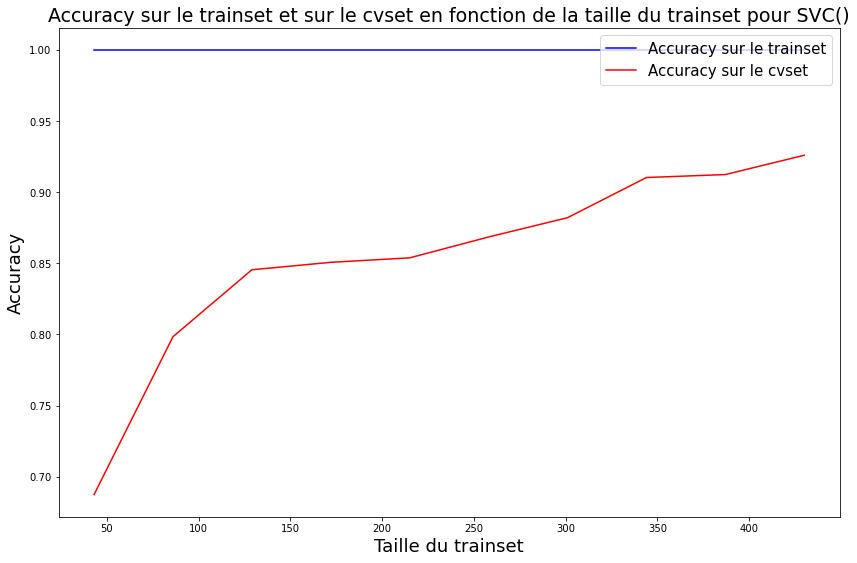

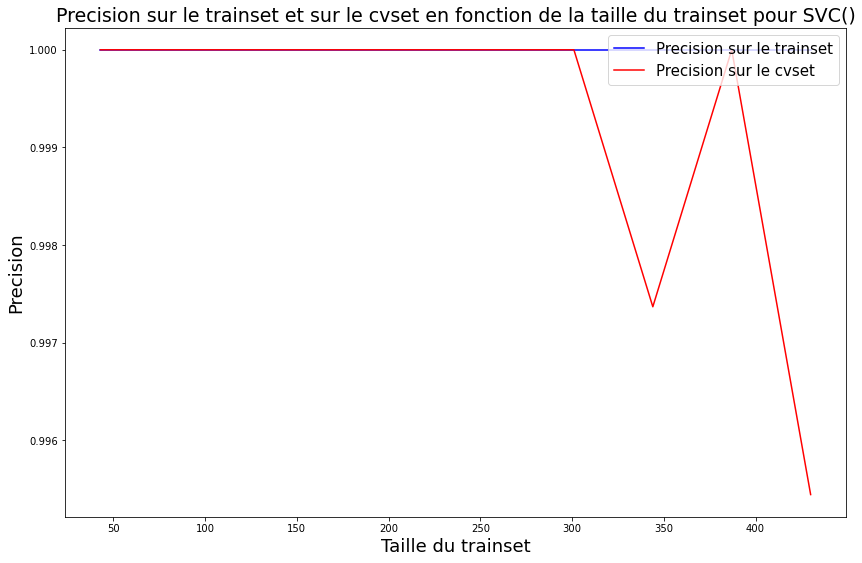

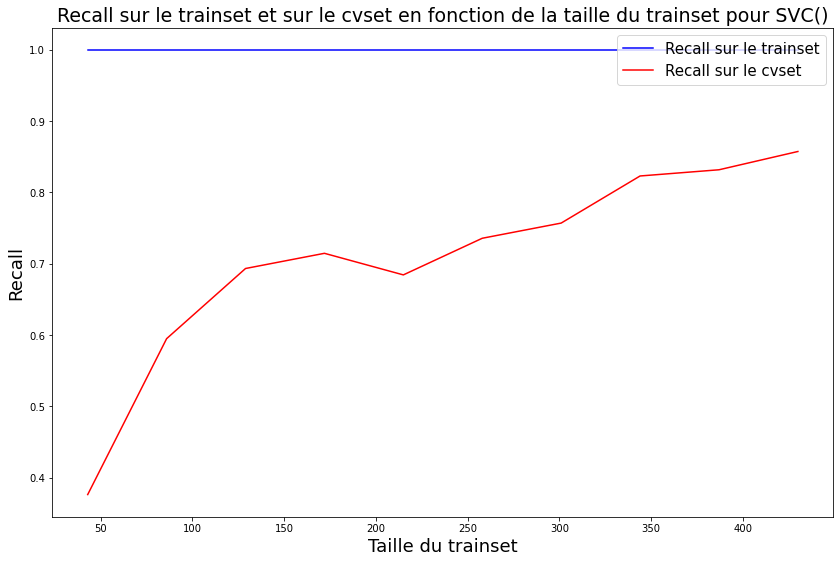

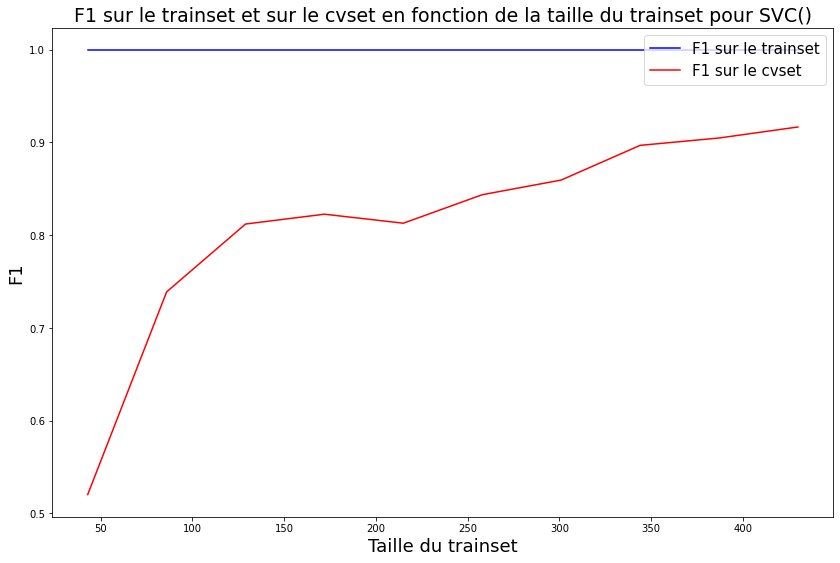

In [16]:
for scoring in scorings:
        get_learning_curve(model, X_train_tfidf, y_train, cv_param, scoring, train_sizes, n_jobs=-1)